In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dash
import jupyter_dash as jd
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import pandas as pd
pd.options.display.max_columns = None

for p in [plotly, dash, jd, dcc, html, dbc, pd]:
    print(f'{p.__name__:-<30}v{p.__version__}')

plotly------------------------v4.14.3
dash--------------------------v1.19.0
jupyter_dash------------------v0.4.0
dash_core_components----------v1.15.0
dash_html_components----------v1.1.2
dash_bootstrap_components-----v0.11.3
pandas------------------------v1.2.3


In [2]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
[f for f in dir(fig) if 'scatter' in f]

['add_scatter',
 'add_scatter3d',
 'add_scattercarpet',
 'add_scattergeo',
 'add_scattergl',
 'add_scattermapbox',
 'add_scatterpolar',
 'add_scatterpolargl',
 'add_scatterternary']

In [3]:
[f for f in dir(px) if 'scatter' in f]

['scatter',
 'scatter_3d',
 'scatter_geo',
 'scatter_mapbox',
 'scatter_matrix',
 'scatter_polar',
 'scatter_ternary']

In [4]:
import pandas as pd
import plotly.graph_objects as go
poverty = pd.read_csv('../data/poverty.csv', low_memory=False)
poverty.head(2)

Country Name Country Code  year  \
0  Afghanistan          AFG  1974   
1  Afghanistan          AFG  1975   

   Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)  \
0                                                NaN                                        
1                                                NaN                                        

   Annualized growth in per capita real survey mean consumption or income, top 10% (%)  \
0                                                NaN                                     
1                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, top 60% (%)  \
0                                                NaN                                     
1                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, total population (%)  \
0                                                NaN                                              
1                                                NaN                                              

   Annualized growth in per capita real survey median income or consumption expenditure (%)  \
0                                                NaN                                          
1                                                NaN                                          

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   

   Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               

   Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               

   Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               

   Income share held by fourth 20%  Income share held by highest 10%  \
0                              NaN                               NaN   
1                              NaN                               NaN   

   Income share held by highest 20%  Income share held by lowest 10%  \
0                               NaN                              NaN   
1                               NaN                              NaN   

   Income share held by lowest 20%  Income share held by second 20%  \
0                              NaN                              NaN   
1                              NaN                              NaN   

   Income share held by third 20%  \
0                             NaN   
1                             NaN   

   Median daily per capita income or consumption expenditure (2011 PPP)  \
0                                                NaN                      
1                                                NaN                      

   Multidimensional poverty, Drinking water (% of population deprived)  \
0                                                NaN                     
1                                                NaN                     

   Multidimensional poverty, Educational attainment (% of population deprived)  \
0                                                NaN                             
1                                                NaN                             

   Multidimensional poverty, Educational enrollment (% of population deprived)  \
0                                                NaN                 

In [5]:
perc_pov_cols = poverty.filter(regex='Poverty gap').columns
perc_pov_cols

Index(['Poverty gap at $1.90 a day (2011 PPP) (%)',
       'Poverty gap at $3.20 a day (2011 PPP) (% of population)',
       'Poverty gap at $5.50 a day (2011 PPP) (% of population)'],
      dtype='object')

In [6]:
perc_pov_19 = perc_pov_cols[0]
perc_pov_32 = perc_pov_cols[1]
perc_pov_55 = perc_pov_cols[2]

In [7]:
series = pd.read_csv('../data/PovStatsSeries.csv')
series = (series.assign(code=series['Series Code'].str.replace('\.', '_', regex=True).str.lower()))
series.head(2)

Series Code                         Topic  \
0  SI.DST.02ND.20  Poverty: Income distribution   
1  SI.DST.03RD.20  Poverty: Income distribution   

                    Indicator Name Short definition  \
0  Income share held by second 20%              NaN   
1   Income share held by third 20%              NaN   

                                     Long definition Unit of measure  \
0  Percentage share of income or consumption is t...               %   
1  Percentage share of income or consumption is t...               %   

  Periodicity  Base Period  Other notes Aggregation method  \
0      Annual          NaN          NaN                NaN   
1      Annual          NaN          NaN                NaN   

                          Limitations and exceptions  \
0  Despite progress in the last decade, the chall...   
1  Despite progress in the last decade, the chall...   

   Notes from original source  \
0                         NaN   
1                         NaN   

                                    General comments  \
0  The World Bank’s internationally comparable po...   
1  The World Bank’s internationally comparable po...   

                                              Source  \
0  World Bank, Development Research Group. Data a...   
1  World Bank, Development Research Group. Data a...   

                 Statistical concept and methodology  \
0  Inequality in the distribution of income is re...   
1  Inequality in the distribution of income is re...   

                               Development relevance Related source links  \
0  The World Bank Group's goal of promoting share...                  NaN   
1  The World Bank Group's goal of promoting share...                  NaN   

   Other web links  Related indicators License Type  Unnamed: 20  \
0              NaN                 NaN    CC BY-4.0          NaN   
1              NaN                 NaN    CC BY-4.0          NaN   

             code  
0  si_dst_02nd_20  
1  si_dst_03rd_20

In [8]:
series[series['Indicator Name']==perc_pov_19]['Short definition'][25]

'Poverty gap at $1.90 a day (2011 PPP) is the mean shortfall in income or consumption from the poverty line $1.90 a day (counting the nonpoor as having zero shortfall), expressed as a percentage of the poverty line. This measure reflects the depth of poverty as well as its incidence. As a result of revisions in PPP exchange rates, poverty rates for individual countries cannot be compared with poverty rates reported in earlier editions.'

In [9]:
country = 'China'
df = poverty[poverty['Country Name']==country][['year', perc_pov_19]].dropna()
df.head(2)

year  Poverty gap at $1.90 a day (2011 PPP) (%)
1321  1990                                       24.1
1324  1993                                       20.3

('markers',)


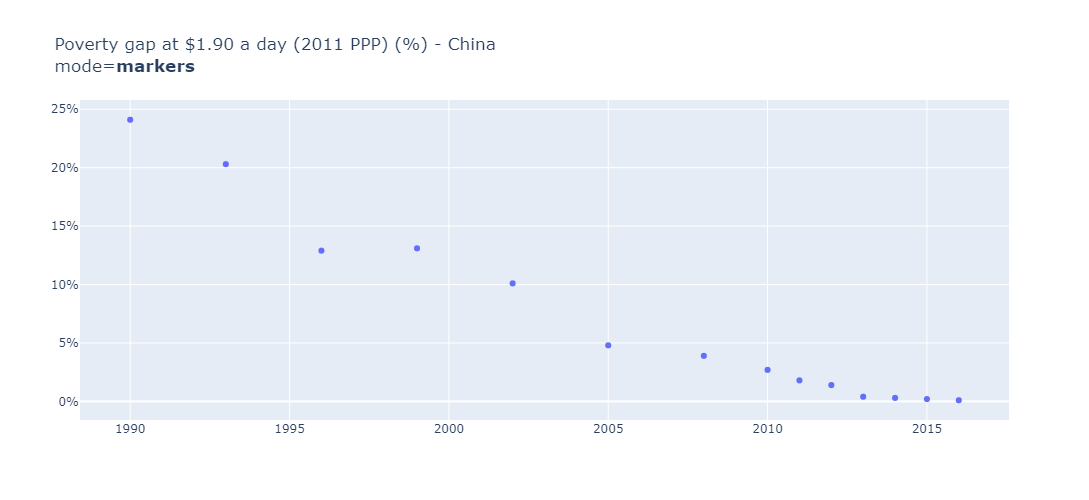

('lines',)


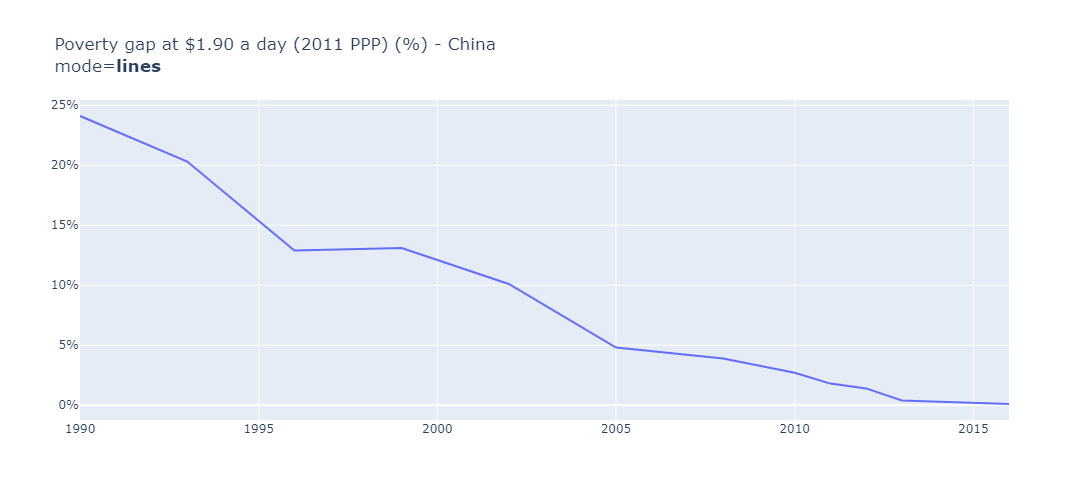

('text',)


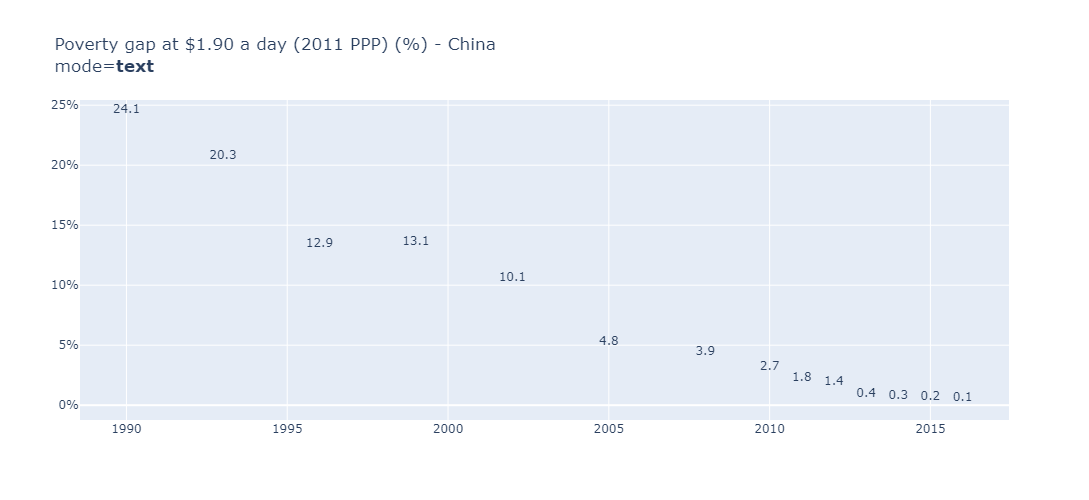

('markers', 'lines')


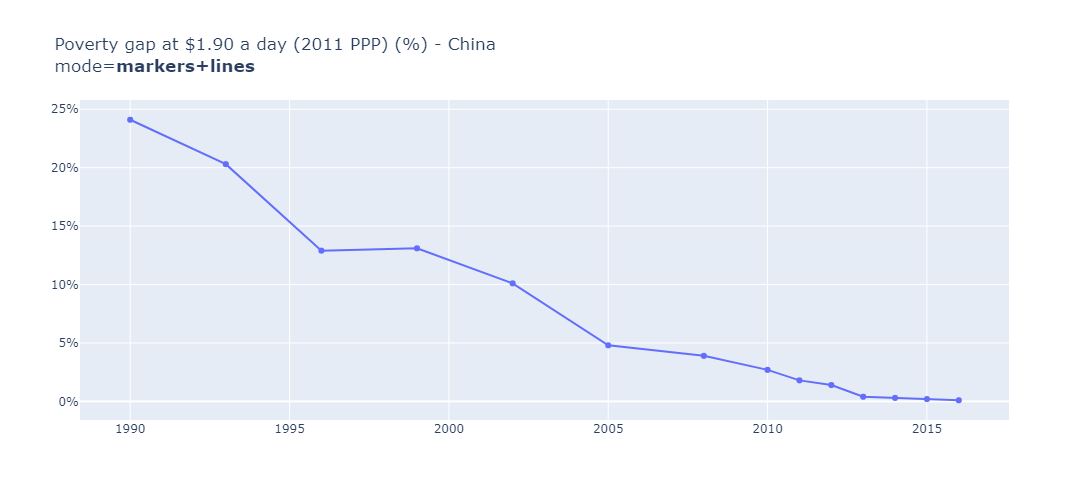

('markers', 'text')


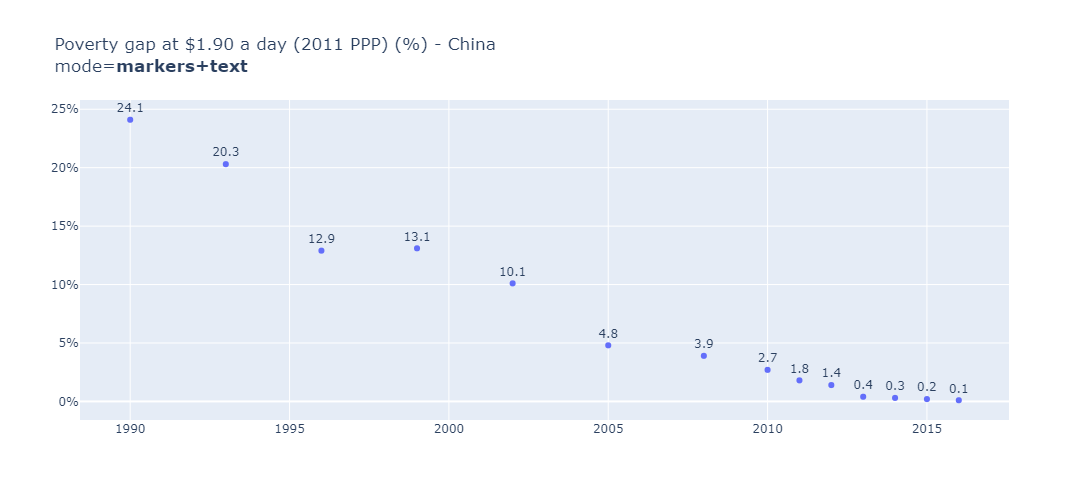

('lines', 'text')


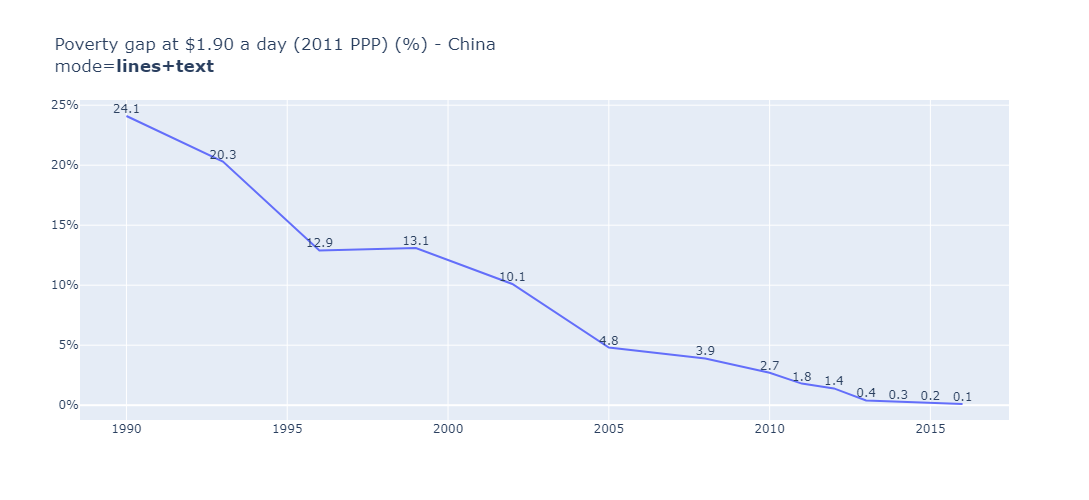

('markers', 'lines', 'text')


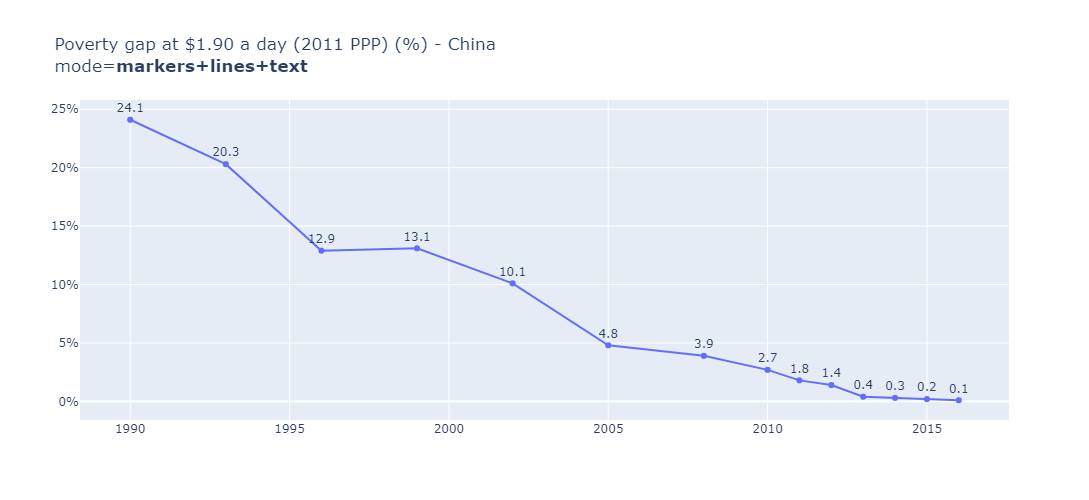

In [11]:
from itertools import combinations
modes = ['markers', 'lines', 'text']

for i in range(1, 4):
    for comb in combinations(modes, i):
        print(comb)
        fig = go.Figure()
        fig.add_scatter(x=df['year'],
                       y=df[perc_pov_19],
                       text=df[perc_pov_19],
                       mode = '+'.join(comb),
                       textposition='top center'
                       )
        fig.layout.title = f'{perc_pov_19} - China<br>mode=<b>{"+".join(comb)}</b>'
        fig.layout.yaxis.ticksuffix = '%'
        fig.layout.width = 750
        fig.layout.height = 500
#         fig.write_image('+'.join(comb) + '.png', scale=2)
        fig.show()

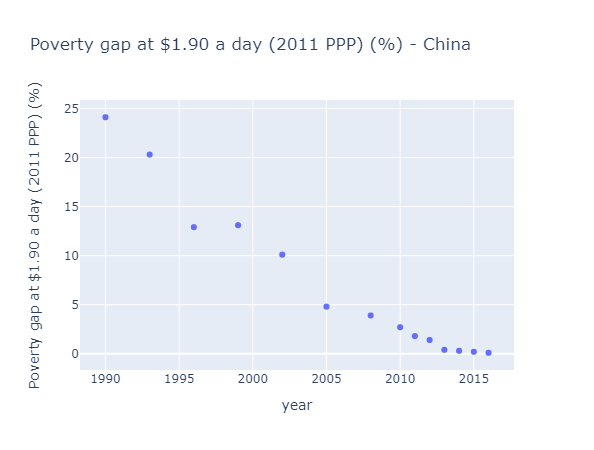

In [13]:
px.scatter(df, x='year', y=perc_pov_19, title=f'{perc_pov_19} - China')

## Creating multiple scatter traces in a single plot

In [14]:
countries = ['Argentina', 'Mexico', 'Brazil']

In [19]:
df = (poverty
      [poverty['Country Name'].isin(countries)]
      [['year', 'Country Name', perc_pov_19]]
      .dropna())
df.head(2)

year Country Name  Poverty gap at $1.90 a day (2011 PPP) (%)
186  1980    Argentina                                        0.2
192  1986    Argentina                                        0.0

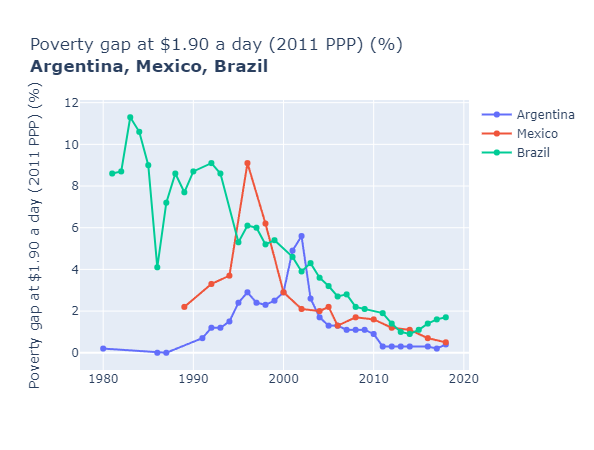

In [22]:
fig = go.Figure()
for country in countries:
    df_country = df[df['Country Name']==country]
    fig.add_scatter(x=df_country['year'],
                   y=df_country[perc_pov_19],
                   name=country,
                   mode='markers+lines')
fig.layout.title = perc_pov_19 + '<br><b>' + ', '.join(countries) + '<b>'
fig.layout.yaxis.title = perc_pov_19
fig.show()

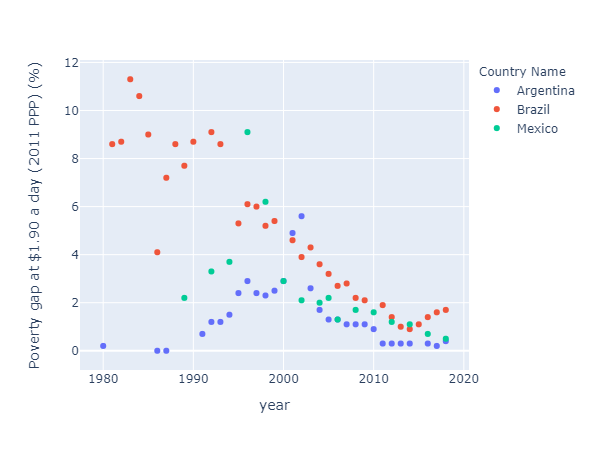

In [24]:
px.scatter(df, x='year', y=perc_pov_19, color='Country Name')

In [55]:
fig = px.scatter(df,
                x='year',
                y=perc_pov_19,
                color='Country Name')

In [56]:
fig.show('json')

In [57]:
fig_lines = px.line(df,
                   x='year',
                   y=perc_pov_19,
                   color='Country Name')

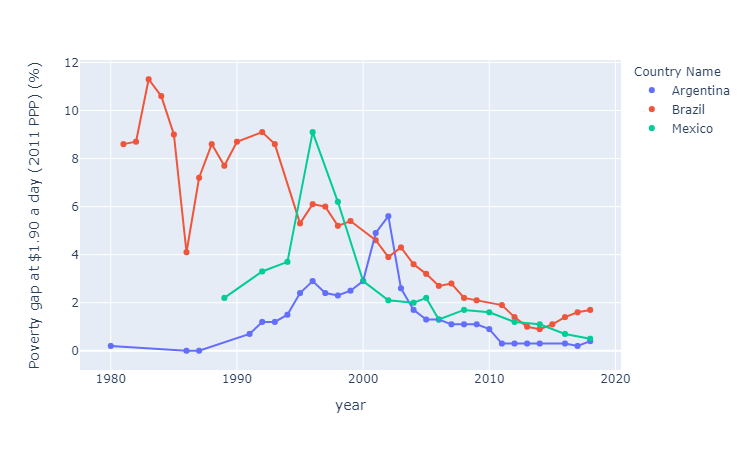

In [58]:
for trace in fig_lines.data:
    trace.showlegend = False
    fig.add_trace(trace)
fig.show()

In [59]:
fig_lines.show('json')

In [62]:
fig.show('json')

In [63]:
indicator = perc_pov_19
year = 1991

In [65]:
df = poverty[poverty['year'].eq(year) & poverty['is_country']].dropna(subset=[indicator]).sort_values(indicator)
df.head(2)

Country Name Country Code  year  \
2397      Finland          FIN  1991   
2667      Germany          DEU  1991   

      Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)  \
2397                                                NaN                                        
2667                                                NaN                                        

      Annualized growth in per capita real survey mean consumption or income, top 10% (%)  \
2397                                                NaN                                     
2667                                                NaN                                     

      Annualized growth in per capita real survey mean consumption or income, top 60% (%)  \
2397                                                NaN                                     
2667                                                NaN                                     

      Annualized growth in per capita real survey mean consumption or income, total population (%)  \
2397                                                NaN                                              
2667                                                NaN                                              

      Annualized growth in per capita real survey median income or consumption expenditure (%)  \
2397                                                NaN                                          
2667                                                NaN                                          

      GINI index (World Bank estimate)  \
2397                              22.9   
2667                              29.2   

      Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)  \
2397                                                NaN                               
2667                                                NaN                               

      Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)  \
2397                                                NaN                               
2667                                                NaN                               

      Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)  \
2397                                                NaN                               
2667                                                NaN                               

      Income share held by fourth 20%  Income share held by highest 10%  \
2397                             22.6                              19.6   
2667                             23.0                              22.9   

      Income share held by highest 20%  Income share held by lowest 10%  \
2397                              33.6                              4.6   
2667                              38.0                              3.7   

      Income share held by lowest 20%  Income share held by second 20%  \
2397                             10.7                             14.9   
2667                              8.8                             13.1   

      Income share held by third 20%  \
2397                            18.2   
2667                            17.2   

      Median daily per capita income or consumption expenditure (2011 PPP)  \
2397                                                NaN                      
2667                                                NaN                      

      Multidimensional poverty, Drinking water (% of population deprived)  \
2397                                                NaN                     
2667                                                NaN                     

      Multidimensional poverty, Educational attainment (% of population deprived)  \
2397                                                NaN                             
2667                                                NaN                             

 

In [67]:
df[[indicator, 'Country Name', 'Population, total']]

Poverty gap at $1.90 a day (2011 PPP) (%)    Country Name  \
2397                                        0.0         Finland   
2667                                        0.0         Germany   
4466                                        0.0      Luxembourg   
1142                                        0.1          Canada   
7735                                        0.1  United Kingdom   
5636                                        0.2          Norway   
3566                                        0.2           Italy   
7780                                        0.3   United States   
197                                         0.7       Argentina   
3116                                        1.0         Hungary   
1547                                        5.7      Costa Rica   
2044                                       10.3     El Salvador   
422                                        11.3      Bangladesh   
3071                                       13.4        Honduras   
5771                                       14.0          Panama   
2712                                       17.7           Ghana   
2892                                       22.7   Guinea-Bissau   
7195                                       30.6        Tanzania   
8214                                       34.7          Zambia   
6311                                       36.0         Senegal   
2847                                       61.9          Guinea   

      Population, total  
2397          5013740.0  
2667         80013896.0  
4466           387000.0  
1142         28037420.0  
7735         57424897.0  
5636          4261732.0  
3566         56758521.0  
7780        252981000.0  
197          33079000.0  
3116         10373400.0  
1547          3202085.0  
2044          5342198.0  
422         105599127.0  
3071          5098591.0  
5771          2523118.0  
2712         15207367.0  
2892           997522.0  
7195         26056594.0  
8214          8246656.0  
6311          7755496.0  
2847          6534939.0

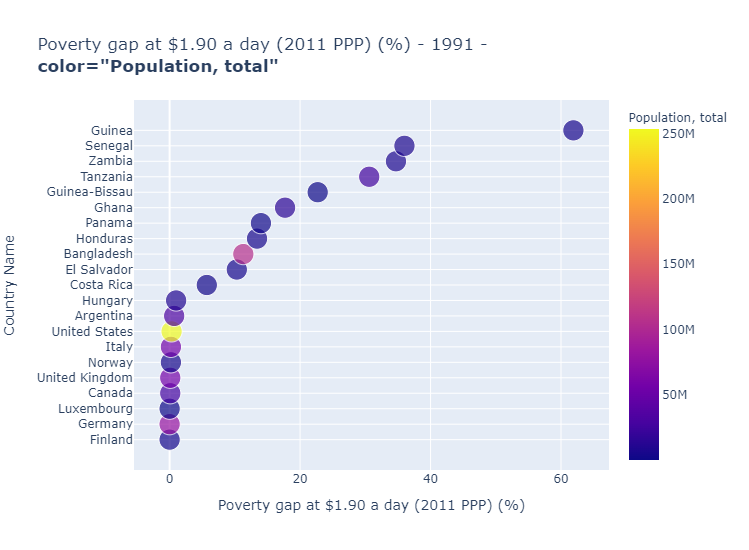

In [70]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Population, total',
          title = ' - '.join([indicator, str(year), '<br><b>color="Population, total"<b>']),
          height=550,
          size_max=15,
          size=[10] * len(df)
          )

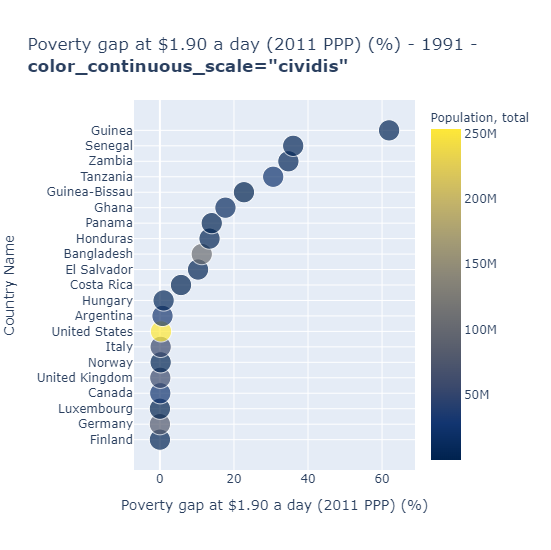

In [71]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Population, total',
          color_continuous_scale='cividis',
          title=' - '.join([indicator, str(year), '<br><b>color_continuous_scale="cividis"</b>']),
          hover_name='Country Name',
          height=550,
          size_max=15,
          size=[10] * len(df)
          )

In [75]:
scales = sorted(plotly.colors.named_colorscales())
print(f"Plotly Named Colorscales ({len(scales)} scales):\n")
print(*scales, sep=', ')

Plotly Named Colorscales (94 scales):

aggrnyl, agsunset, algae, amp, armyrose, balance, blackbody, bluered, blues, blugrn, bluyl, brbg, brwnyl, bugn, bupu, burg, burgyl, cividis, curl, darkmint, deep, delta, dense, earth, edge, electric, emrld, fall, geyser, gnbu, gray, greens, greys, haline, hot, hsv, ice, icefire, inferno, jet, magenta, magma, matter, mint, mrybm, mygbm, oranges, orrd, oryel, oxy, peach, phase, picnic, pinkyl, piyg, plasma, plotly3, portland, prgn, pubu, pubugn, puor, purd, purp, purples, purpor, rainbow, rdbu, rdgy, rdpu, rdylbu, rdylgn, redor, reds, solar, spectral, speed, sunset, sunsetdark, teal, tealgrn, tealrose, tempo, temps, thermal, tropic, turbid, turbo, twilight, viridis, ylgn, ylgnbu, ylorbr, ylorrd


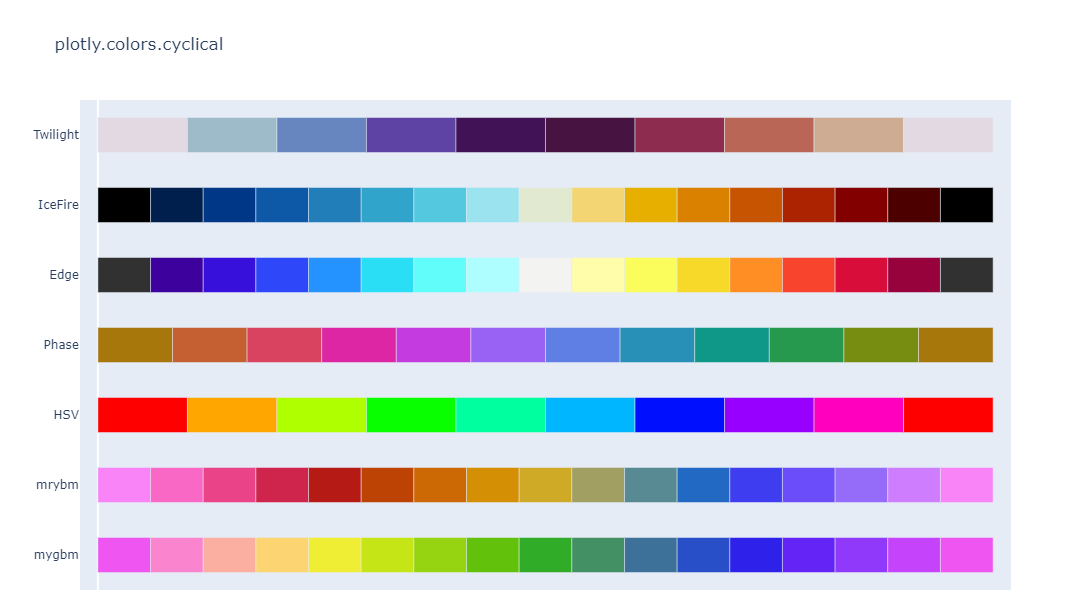

In [79]:
plotly.colors.cyclical.swatches()

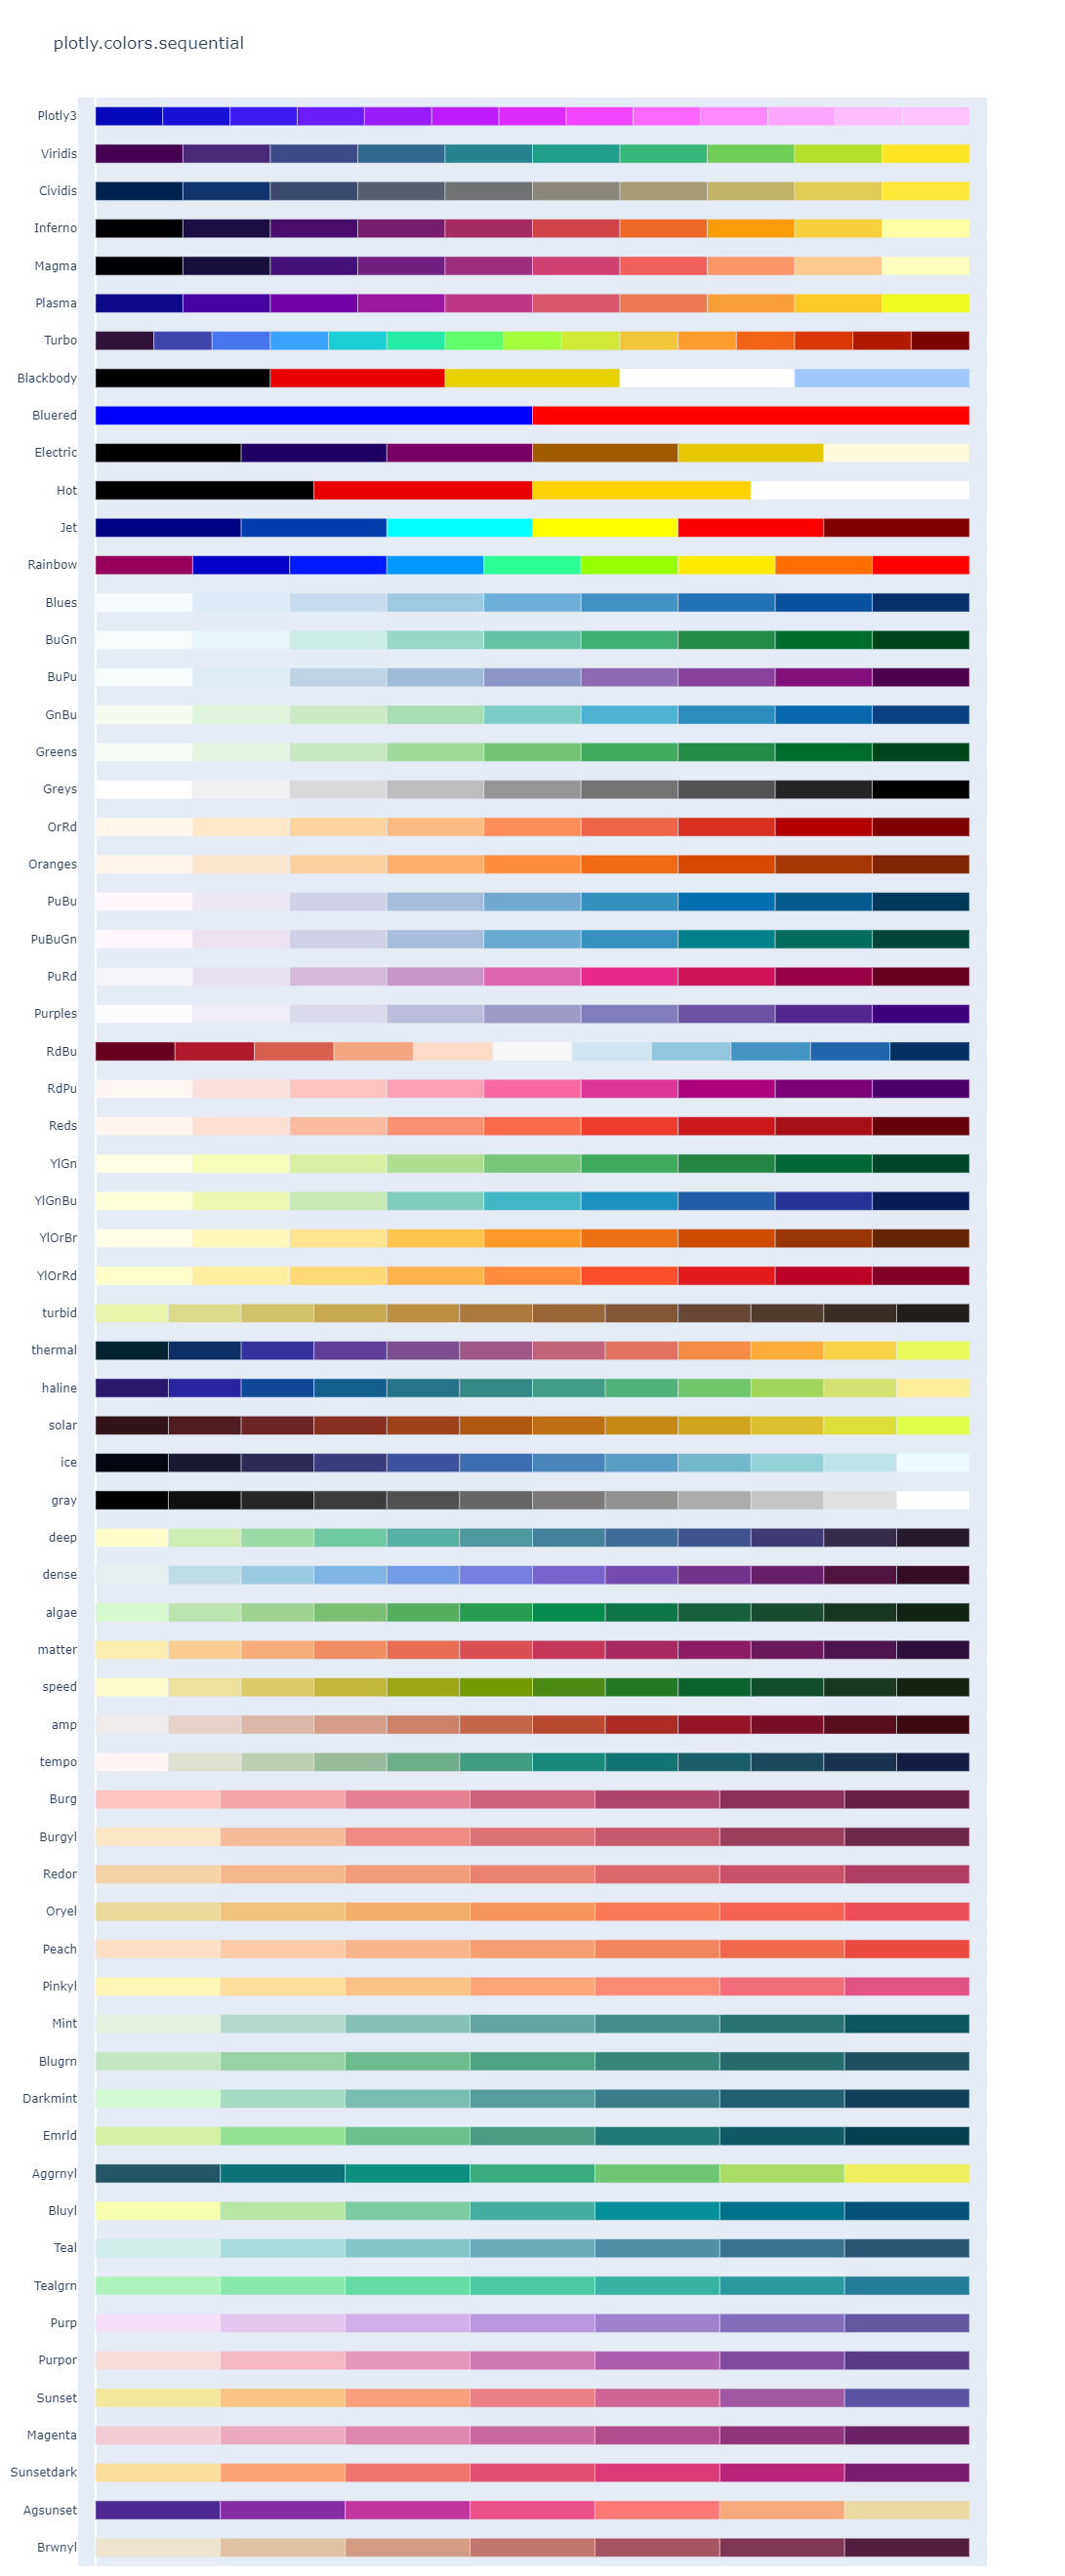

In [86]:
px.colors.sequential.swatches()

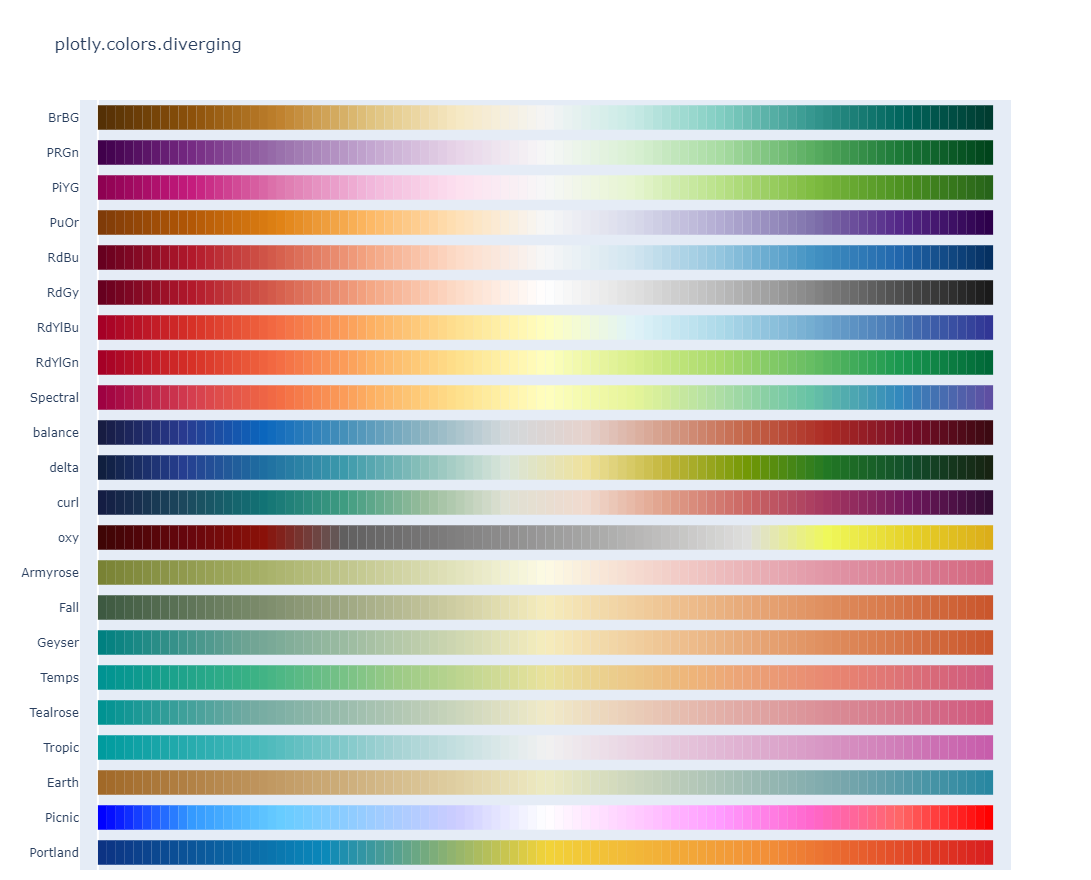

In [87]:
px.colors.diverging.swatches_continuous()

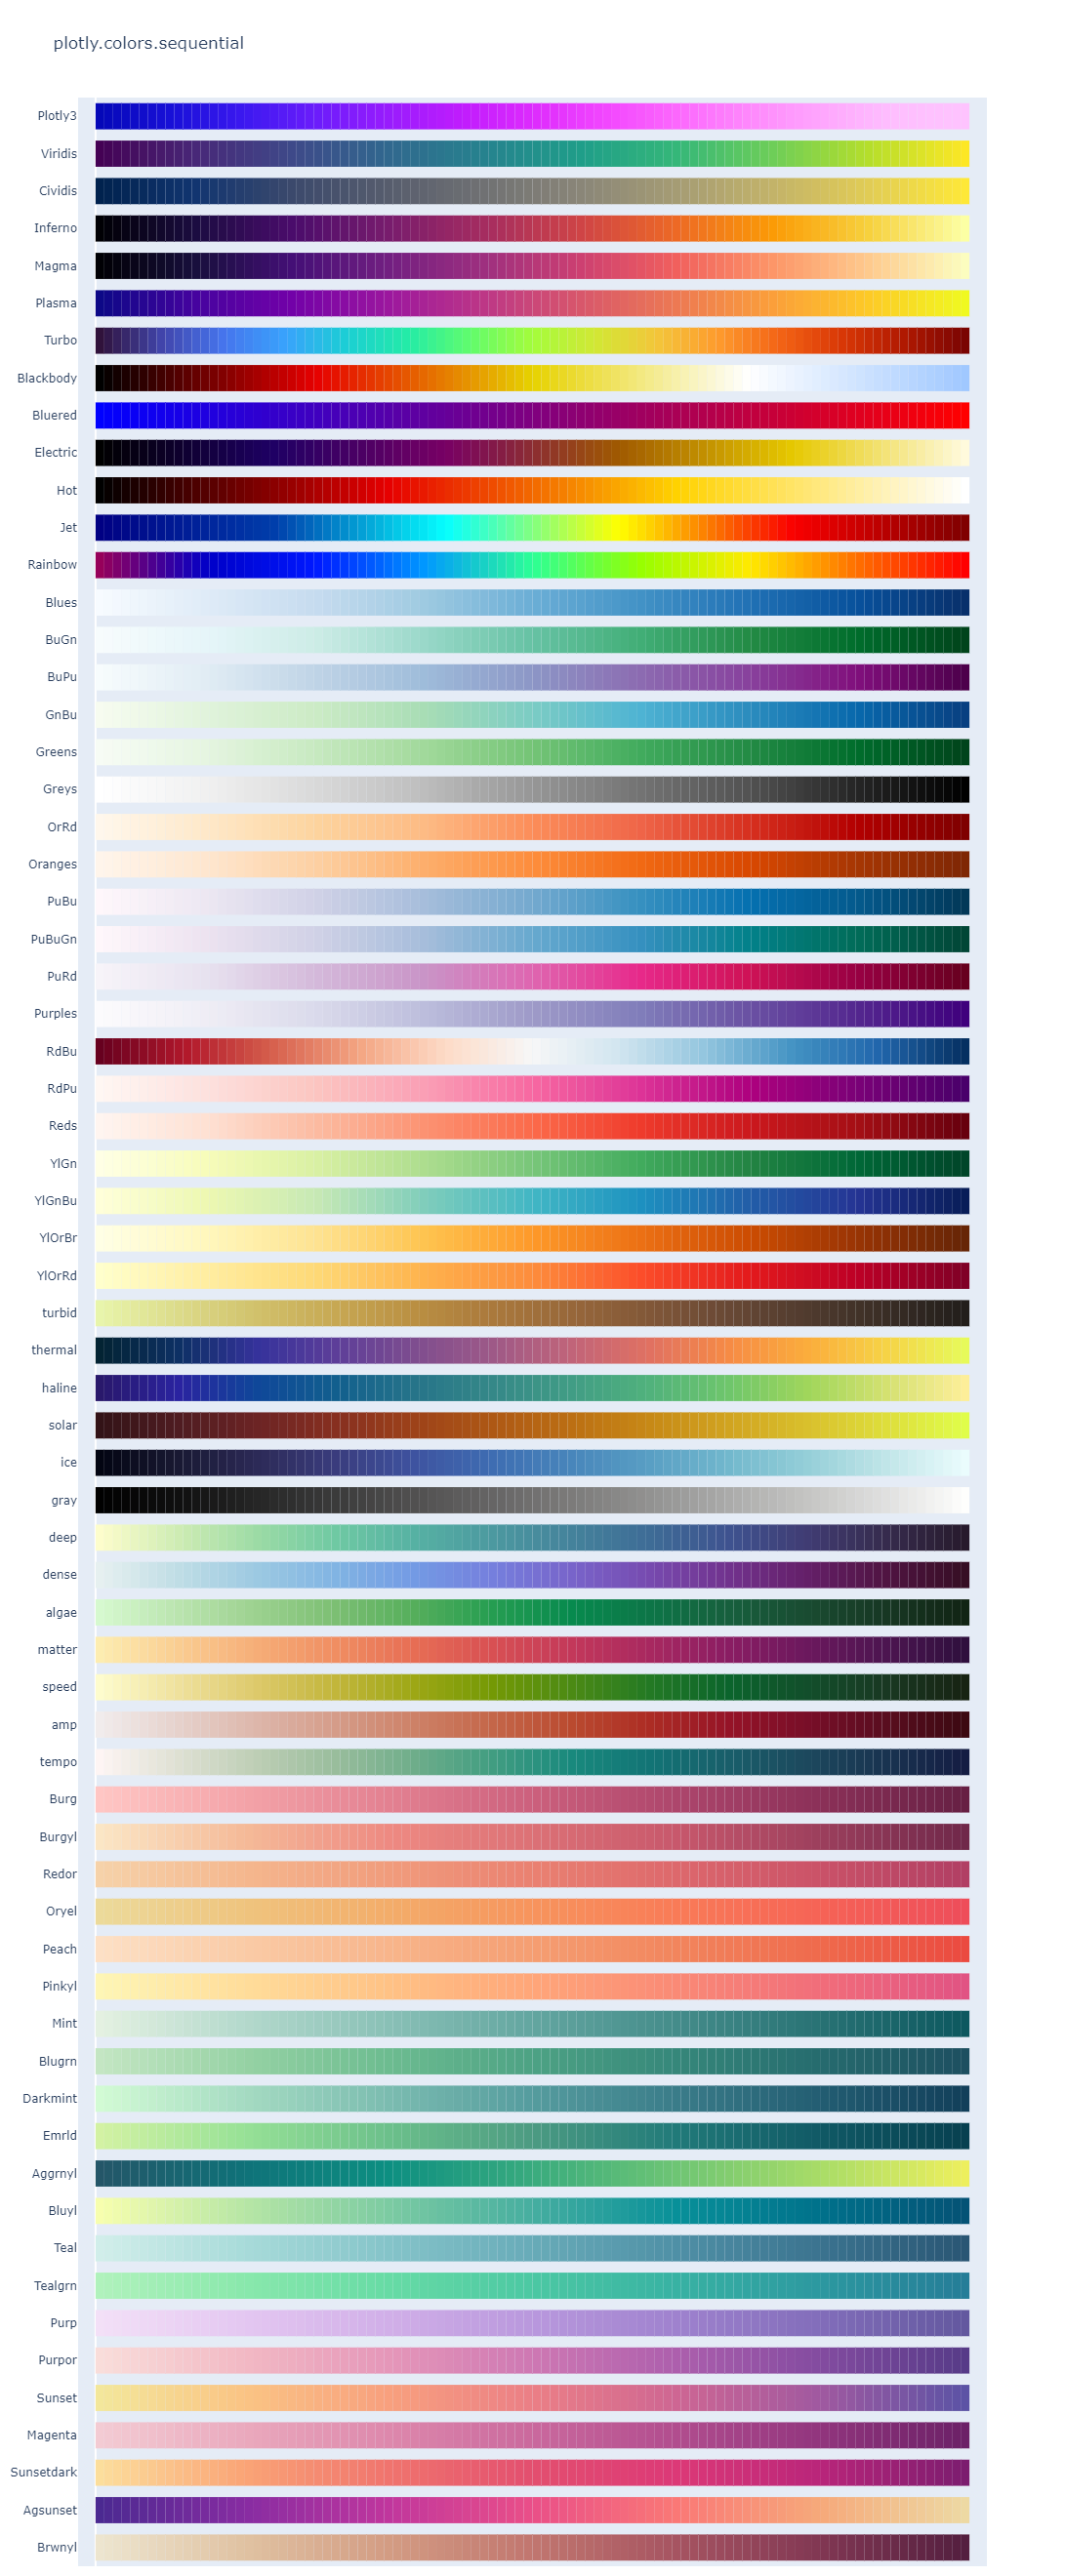

In [88]:
px.colors.sequential.swatches_continuous()

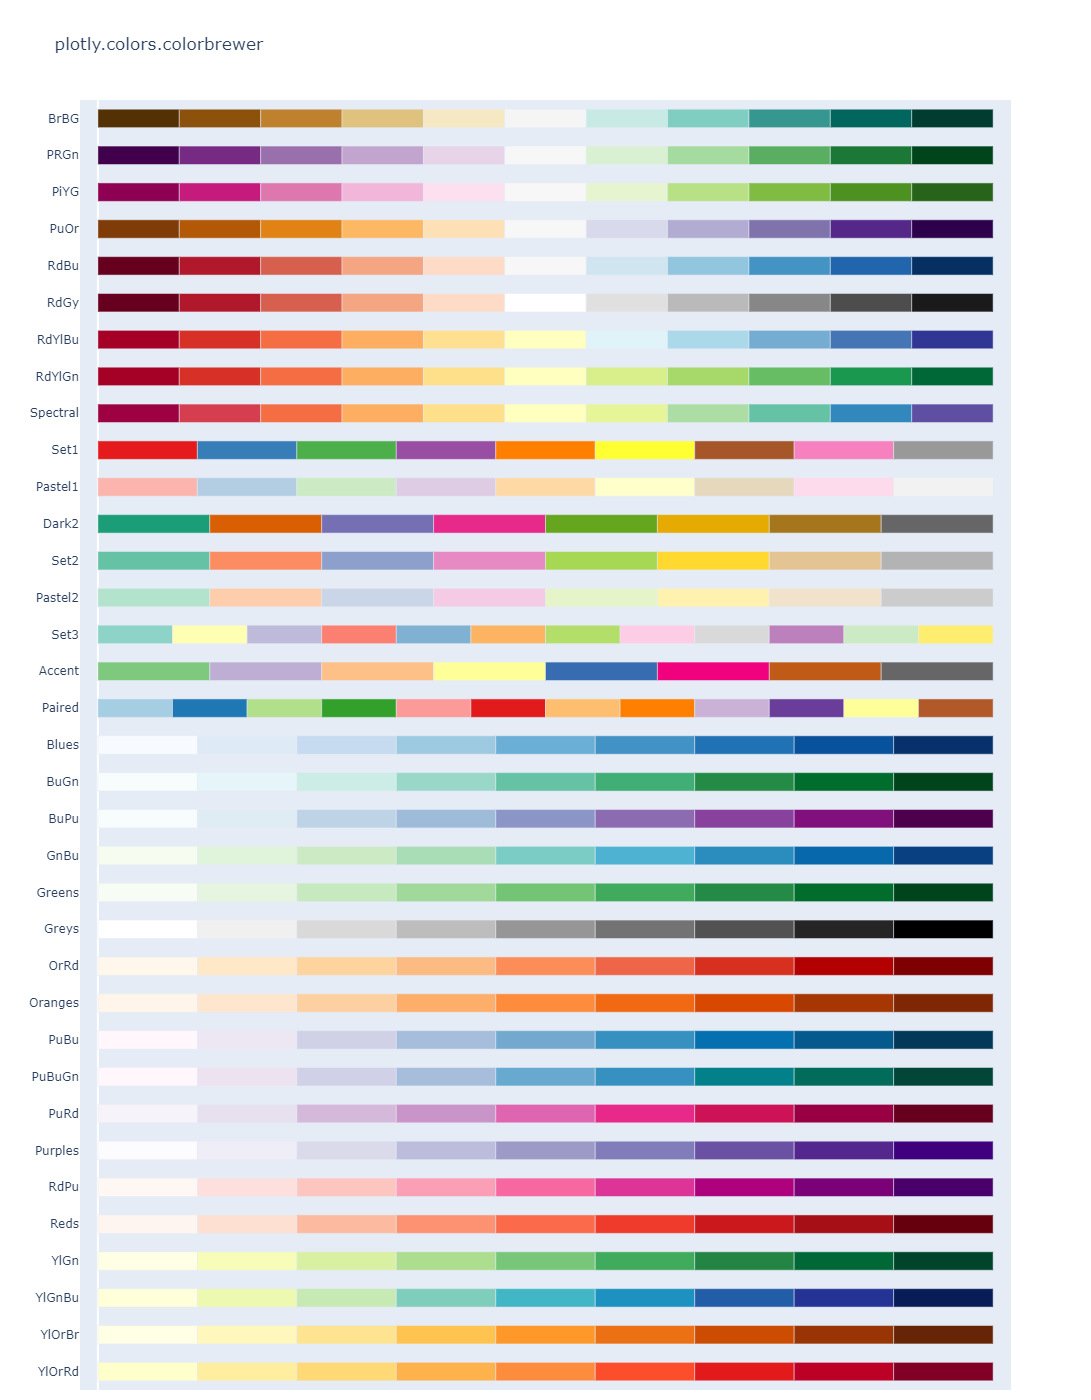

In [90]:
px.colors.colorbrewer.swatches()

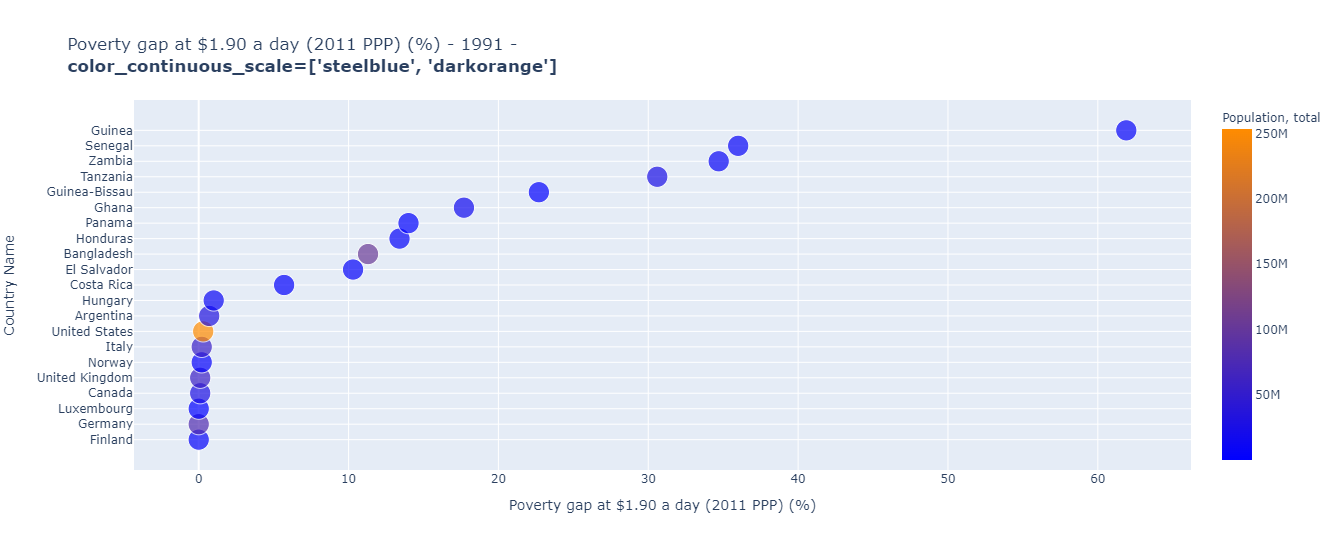

In [95]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Population, total',
          color_continuous_scale=['steelblue', 'darkorange'],
          title=' - '.join([indicator, str(year), "<br><b>color_continuous_scale=['steelblue', 'darkorange']</b>"]),
          hover_name='Country Name',
          size_max=15,
          height=550,
          size=[10] * len(df)
          )

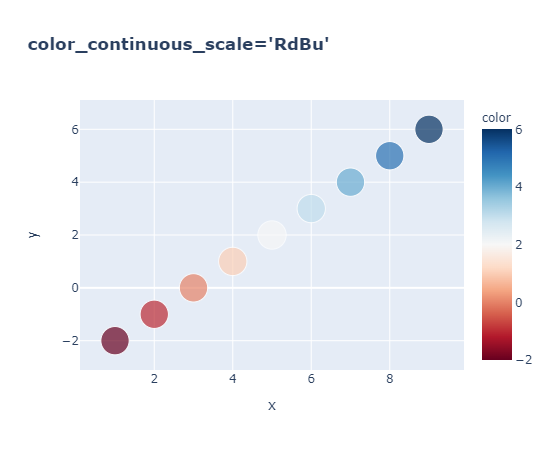

In [96]:
y = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
px.scatter(x=range(1, len(y)+1), y=y, size=[10]*len(y), color=y,
          color_continuous_scale='RdBu',
          title="<b>color_continuous_scale='RdBu'</b>")

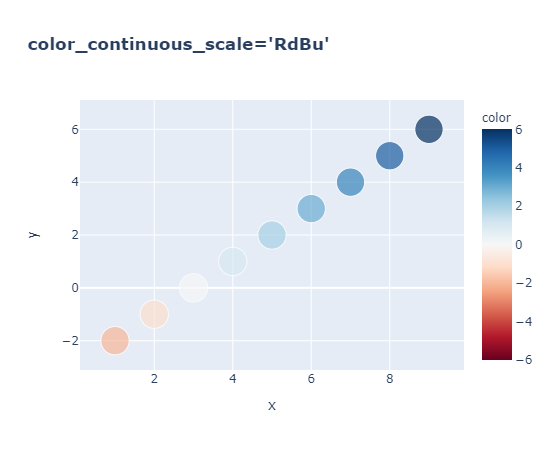

In [97]:
y = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
px.scatter(x=range(1, len(y)+1), y=y, size=[10]*len(y), color=y,
          color_continuous_scale='RdBu',
          color_continuous_midpoint=0,
          title="<b>color_continuous_scale='RdBu'</b>")

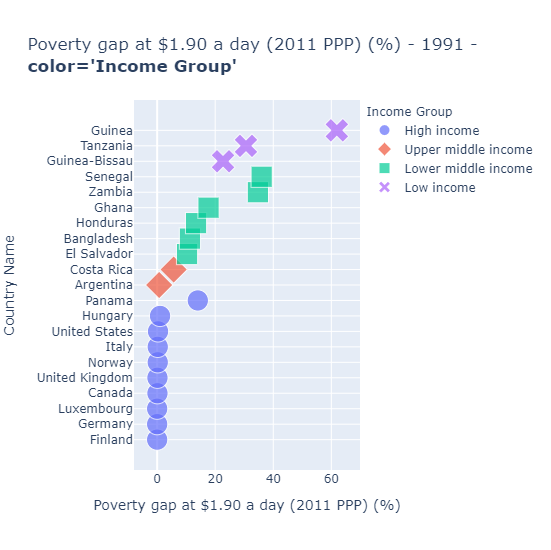

In [99]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Income Group',
          symbol='Income Group',
          title=' - '.join([indicator, str(year), "<br><b>color='Income Group'</b>"]),
          hover_name='Country Name',
          size_max=15,
          height=550,
          size=[10] * len(df)
          )

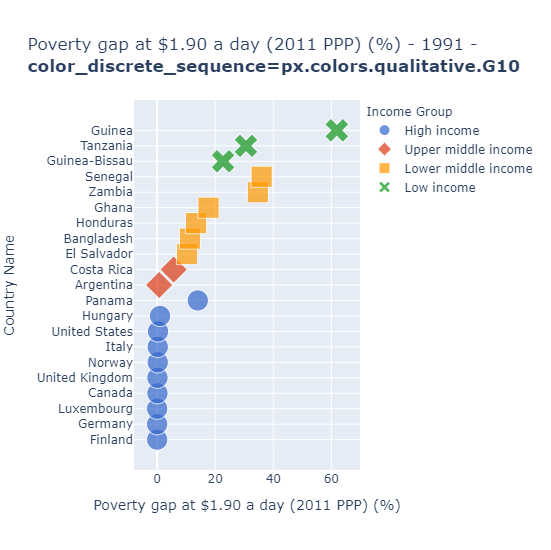

In [109]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Income Group',
          symbol='Income Group',
          color_discrete_sequence=px.colors.qualitative.G10,
          title = ' - '.join([indicator, str(year), "<br><b>color_discrete_sequence=px.colors.qualitative.G10<b>"]),
          hover_name='Country Name',
          height=550,
          size_max=15,
          size=[10] * len(df)
          )

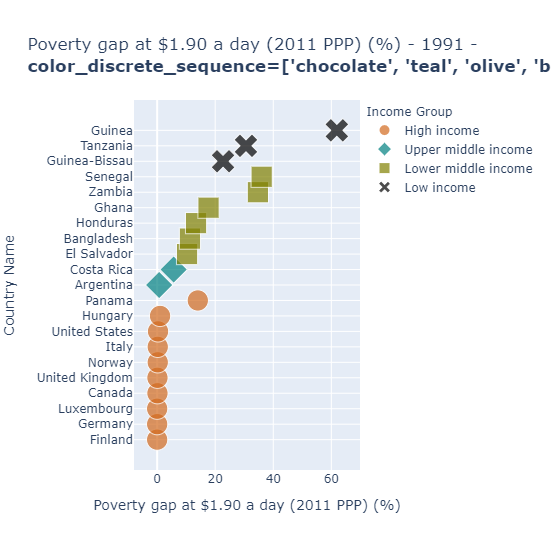

In [110]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Income Group',
          symbol='Income Group',
          color_discrete_sequence=['chocolate', 'teal', 'olive', 'black'],
          title=' - '.join([indicator, str(year), "<br><b>color_discrete_sequence=['chocolate', 'teal', 'olive', 'black']</b>"]),
          hover_name='Country Name',
          height=550,
          size_max=15,
          size=[10] * len(df)
          )

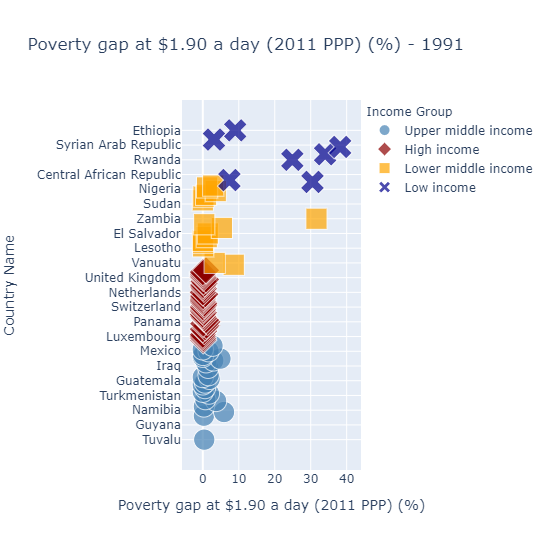

In [170]:
px.scatter(df,
          x=indicator,
          y='Country Name',
          color='Income Group',
          symbol='Income Group',
          color_discrete_map={'High income': 'darkred',
                              'Upper middle income': 'steelblue',
                              'Lower middle income': 'orange',
                              'Low income': 'darkblue'},
          title=' - '.join([indicator, str(year)]),
          hover_name='Country Name',
          height=550,
          size_max=15,
          size=[10] * len(df)
          )

## Handling over-plotting and outlier values by managing opacity, symbols, and scales

In [113]:
df = poverty[poverty['year'].eq(2010) & poverty['is_country']].sort_values('Population, total')
df.head(2)

Country Name Country Code  year  \
7619       Tuvalu          TUV  2010   
5745        Palau          PLW  2010   

      Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)  \
7619                                                NaN                                        
5745                                                NaN                                        

      Annualized growth in per capita real survey mean consumption or income, top 10% (%)  \
7619                                                NaN                                     
5745                                                NaN                                     

      Annualized growth in per capita real survey mean consumption or income, top 60% (%)  \
7619                                                NaN                                     
5745                                                NaN                                     

      Annualized growth in per capita real survey mean consumption or income, total population (%)  \
7619                                                NaN                                              
5745                                                NaN                                              

      Annualized growth in per capita real survey median income or consumption expenditure (%)  \
7619                                                NaN                                          
5745                                                NaN                                          

      GINI index (World Bank estimate)  \
7619                              39.1   
5745                               NaN   

      Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)  \
7619                                                NaN                               
5745                                                NaN                               

      Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)  \
7619                                                NaN                               
5745                                                NaN                               

      Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)  \
7619                                                NaN                               
5745                                                NaN                               

      Income share held by fourth 20%  Income share held by highest 10%  \
7619                             21.3                              30.7   
5745                              NaN                               NaN   

      Income share held by highest 20%  Income share held by lowest 10%  \
7619                              46.4                              2.7   
5745                               NaN                              NaN   

      Income share held by lowest 20%  Income share held by second 20%  \
7619                              6.6                             10.8   
5745                              NaN                              NaN   

      Income share held by third 20%  \
7619                            15.0   
5745                             NaN   

      Median daily per capita income or consumption expenditure (2011 PPP)  \
7619                                                NaN                      
5745                                                NaN                      

      Multidimensional poverty, Drinking water (% of population deprived)  \
7619                                                0.0                     
5745                                                NaN                     

      Multidimensional poverty, Educational attainment (% of population deprived)  \
7619                                                4.5                             
5745                                                NaN                             

 

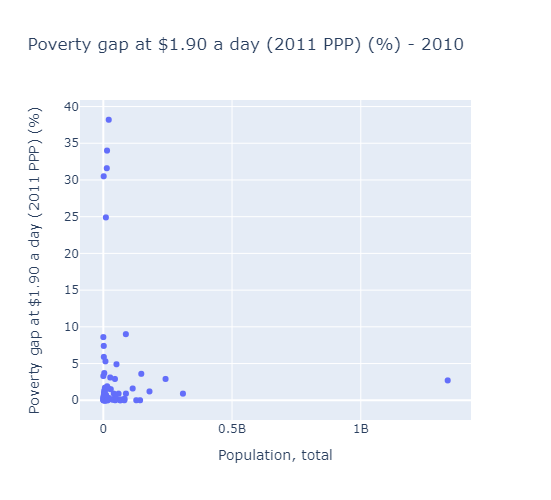

In [114]:
px.scatter(df,
          y=perc_pov_19,
          x='Population, total',
          title=' - '.join([perc_pov_19, '2010']),
          height=500)

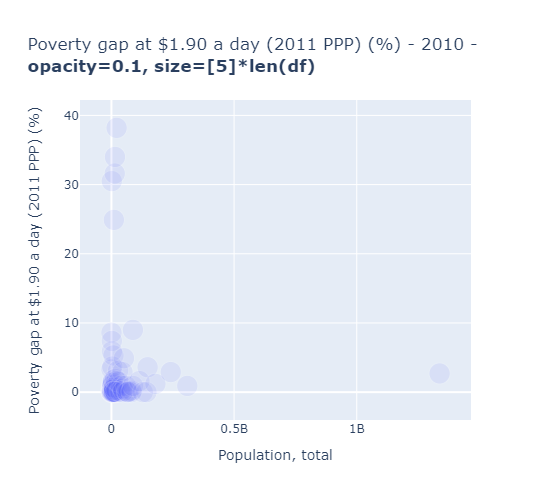

In [115]:
px.scatter(df,
          y=perc_pov_19,
          x='Population, total',
          opacity=0.1,
          title=' - '.join([perc_pov_19, '2010', '<br><b>opacity=0.1, size=[5]*len(df)</b>']),
          height=500,
          size=[5]*len(df),
          size_max=15          
          )

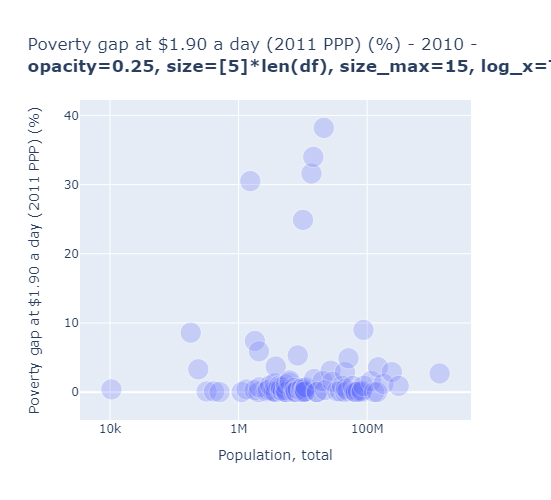

In [118]:
px.scatter(df,
          y=perc_pov_19,
          x='Population, total',
          opacity=0.25,
#           symbol_sequence=['circle-open'],
          title=' - '.join([perc_pov_19, '2010', '<br><b>opacity=0.25, size=[5]*len(df), size_max=15, log_x=True</b>']),
          height=500,
          size=[5]*len(df),
          size_max=15,
          log_x=True
          )

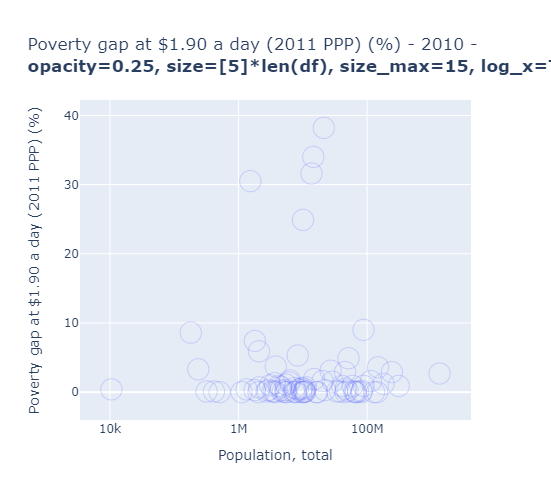

In [119]:
px.scatter(df,
          y=perc_pov_19,
          x='Population, total',
          opacity=0.25,
          symbol_sequence=['circle-open'],
          title=' - '.join([perc_pov_19, '2010', '<br><b>opacity=0.25, size=[5]*len(df), size_max=15, log_x=True</b>']),
          height=500,
          size=[5]*len(df),
          size_max=15,
          log_x=True
          )

In [123]:
app = JupyterDash(__name__)
app.layout = html.Div([
    dcc.Slider(),
    dcc.Slider(min=0,
              max=10,
              step=1,
              dots=True,
              included=False,
              marks={x: str(x) for x in range(11)}
              )
])
app.run_server(mode='inline')

In [125]:
px.colors.sequential.Cividis_r

['#fee838',
 '#e1cc55',
 '#c3b369',
 '#a59c74',
 '#8a8678',
 '#707173',
 '#575d6d',
 '#3b496c',
 '#123570',
 '#00224e']

In [128]:
cividis0 = px.colors.sequential.Cividis[0]
cividis0

'#00224e'

In [129]:
marks = {0: {'label': '$1.9', 'style': {'color': cividis0, 'fontWeight': 'bold'}},
         1: {'label': '$3.2', 'style': {'color': cividis0, 'fontWeight': 'bold'}},
         2: {'label': '$5.5', 'style': {'color': cividis0, 'fontWeight': 'bold'}}
        }

In [137]:
perc_pov_df = poverty[poverty['is_country']].dropna(subset=perc_pov_cols)
perc_pov_years = sorted(set(perc_pov_df['year']))

In [158]:
app = JupyterDash(__name__)
app.layout = html.Div([
    dcc.Slider(id='perc_pov_year_slider',
          min=perc_pov_years[0],
          max=perc_pov_years[-1],
          step=1,
          included=False,
          value=2018,
          marks={year: {'label': str(year),
                         'style': {'color': cividis0}}
                for year in perc_pov_years[::5]})
])
app.run_server(mode='inline')

In [175]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])

perc_pov_df = poverty[poverty['is_country']].dropna(subset=perc_pov_cols)
perc_pov_years = sorted(set(perc_pov_df['year']))

cividis0 = px.colors.sequential.Cividis[0]

app.layout = html.Div([
    dbc.Row([
        dbc.Col(lg=1),
        dbc.Col([
            html.Br(),
            dbc.Label('Select poverty level:'),
            dcc.Slider(id='perc_pov_indicator_slider',
                      min=0,
                      max=2,
                      step=1,
                      included=False,
                      value=0,
                      marks={0: {'label': '$1.9', 'style': {'color': cividis0, 'fontWeight': 'bold'}},
                             1: {'label': '$3.2', 'style': {'color': cividis0, 'fontWeight': 'bold'}},
                             2: {'label': '$5.5', 'style': {'color': cividis0, 'fontWeight': 'bold'}},
                            }
                      )
        ], lg=2),
        dbc.Col([
            html.Br(),
            dbc.Label('Select year:'),
            dcc.Slider(id='perc_pov_year_slider',
                      min=perc_pov_years[0],
                      max=perc_pov_years[-1],
                      step=1,
                      included=False,
                      value=2018,
                      marks={year: {'label': str(year),
                                   'style': {'color': cividis0}}
                            for year in perc_pov_years[::5]
                            }),
        ], lg=5)
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='perc_pov_scatter_chart')
        ])
    ])
], style={'backgroundColor': '#E5ECF6'})

@app.callback(Output('perc_pov_scatter_chart', 'figure'),
             Input('perc_pov_year_slider', 'value'),
             Input('perc_pov_indicator_slider', 'value'))
def plot_perc_pov_chart(year, indicator):
    indicator = perc_pov_cols[indicator]
    df = (perc_pov_df
          [perc_pov_df['year'].eq(year)]
          .dropna(subset=[indicator])
          .sort_values(indicator))
    if df.empty:
        raise PreventUpdate
        
    fig = px.scatter(df,
                    x=indicator,
                    y='Country Name',
                    color='Population, total',
                    size=[30]*len(df),
                    size_max=15,
                    hover_name='Country Name',
                    height=250 + (20*len(df)),
                    color_continuous_scale='cividis',
                    title=indicator + '<b>: ' + f'{year}' + '</b>'
                    )
    fig.layout.paper_bgcolor = '#E5ECF6'
    fig.layout.xaxis.ticksuffix = '%'
    return fig
app.run_server(mode='inline', port=8051)

2018 Poverty gap at $1.90 a day (2011 PPP) (%)
1978 Poverty gap at $1.90 a day (2011 PPP) (%)
1982 Poverty gap at $1.90 a day (2011 PPP) (%)
1982 Poverty gap at $3.20 a day (2011 PPP) (% of population)
1992 Poverty gap at $3.20 a day (2011 PPP) (% of population)
1992 Poverty gap at $1.90 a day (2011 PPP) (%)
1991 Poverty gap at $1.90 a day (2011 PPP) (%)
